## MNIST Classification with CNN

In [ ]:
import tensorflow as tf
from keras.src import layers
from keras.src.callbacks import EarlyStopping, ReduceLROnPlateau
import keras
import matplotlib.pyplot as plt

In [ ]:
# Load data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Preprocess data
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

# Reshape to (28, 28, 1) for CNN
train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]

In [71]:
model = keras.Sequential([
    layers.Input((28, 28, 1)),

    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (5, 5), strides=2,activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (5, 5), strides=2,activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.Conv2D(128, (4, 4), strides=2,activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    
    layers.GlobalAveragePooling2D(),
    layers.Dense(10, activation='softmax')
])

In [72]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [73]:
early_stop = EarlyStopping(monitor="val_accuracy", patience=6, restore_best_weights=True)

lr_schedule = ReduceLROnPlateau(
    monitor='val_accuracy',    
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

history = model.fit(
    train_images,
    train_labels,
    epochs=100,
    batch_size=64,
    validation_split=0.1,
    callbacks=[early_stop, lr_schedule],
)

Epoch 1/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.8836 - loss: 0.3757 - val_accuracy: 0.9860 - val_loss: 0.0544 - learning_rate: 0.0010
Epoch 2/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9813 - loss: 0.0610 - val_accuracy: 0.9843 - val_loss: 0.0617 - learning_rate: 0.0010
Epoch 3/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9863 - loss: 0.0431 - val_accuracy: 0.9893 - val_loss: 0.0382 - learning_rate: 0.0010
Epoch 4/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9885 - loss: 0.0355 - val_accuracy: 0.9917 - val_loss: 0.0301 - learning_rate: 0.0010
Epoch 5/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9907 - loss: 0.0310 - val_accuracy: 0.9918 - val_loss: 0.0280 - learning_rate: 0.0010
Epoch 6/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9921 - loss: 0.0260 - val_accuracy: 0.9938 - val_loss: 0.0281 - learning_rate: 0.0010
Epoch 7/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9931 - loss: 

In [74]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"\nTest accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9950 - loss: 0.0189

Test accuracy: 0.9966


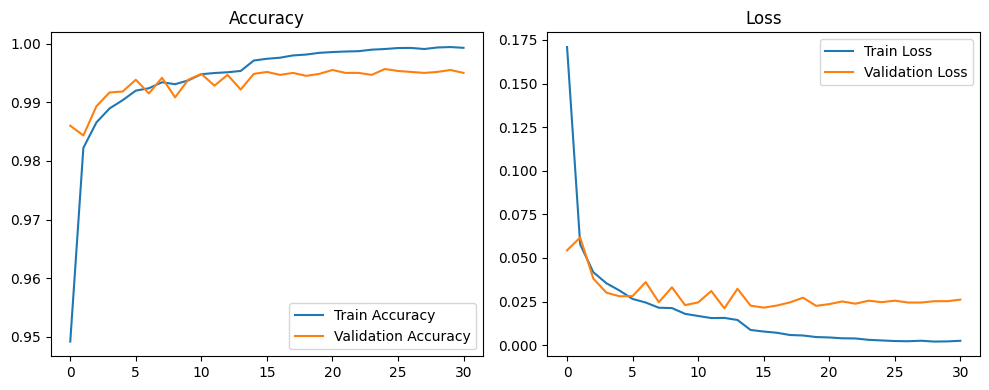

In [75]:
# Plot training history
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Loss")
plt.legend()
plt.tight_layout()
plt.show()

### Test accuracy: 0.9966

# Performance Analysis

| Metric                  | Value        |
| ----------------------- | ------------ |
| **Train Accuracy**      | 99.92%       |
| **Validation Accuracy** | 99.50%       |
| **Test Accuracy**       | **99.66%** |


### Model Architecture Summary

-   **Input shape:** (28, 28, 1)

-   **Total Conv Layers:** 9 convolutional layers in 3 progressively deep blocks

-   **Downsampling:** Strided convolutions (stride=2) instead of pooling layers

-   **Normalization:** BatchNormalization after every convolution

-   **Regularization:** Dropout after each block (0.4)

-   **Final feature reduction:** GlobalAveragePooling2D()

-   **Output:** Dense layer with softmax, 10 units

| Component              | Value                                        |
| ---------------------- | -------------------------------------------- |
| Optimizer              | RMSprop(learning_rate=0.001, rho=0.9)     |
| Loss                   | sparse_categorical_crossentropy           |
| Batch Size             | 64                                         |
| Epochs                 | Up to 100 (early stopped at 31)              |
| Learning Rate Schedule | ReduceLROnPlateau (patience=3, factor=0.5) |
| Regularization         | Dropout (0.4) + BatchNormalization           |
| Final Downsampling     | GlobalAveragePooling2D()                 |


### Learnings

- Begin with a single convolution layer followed by max pooling.
- Achieve high accuracy easily on MNIST.
- Add multiple convolution layers before pooling.
- Notice overfitting begins because validation loss curve starts going up.
- Introduce Dropout & Batch normalization to help with overfitting.
- Try out various combinations of hyperparameters and layers to achieve best performance.

<br>

- Smaller batches give better generalization.
- Stacking of 3x3 kernels helps with non-linearity and extracting features.
- Using 5x5 kernels with stide 2 helps to reduce dimensions while learning.